In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from torchvision import transforms
import imageio
import os
import torch
plt.style.use('dark_background')

In [3]:
dir(imageio)

['FormatManager',
 'RETURN_BYTES',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'config',
 'core',
 'formats',
 'get_reader',
 'get_writer',
 'help',
 'imiter',
 'imopen',
 'imread',
 'imread_v2',
 'imsave',
 'imwrite',
 'mimread',
 'mimsave',
 'mimwrite',
 'mvolread',
 'mvolsave',
 'mvolwrite',
 'plugins',
 'read',
 'save',
 'show_formats',
 'typing',
 'v2',
 'v3',
 'volread',
 'volsave',
 'volwrite',
 'warnings']

In [16]:
img = imageio.v2.imread('pictures/lion.jpg')
img.shape

(225, 225, 3)

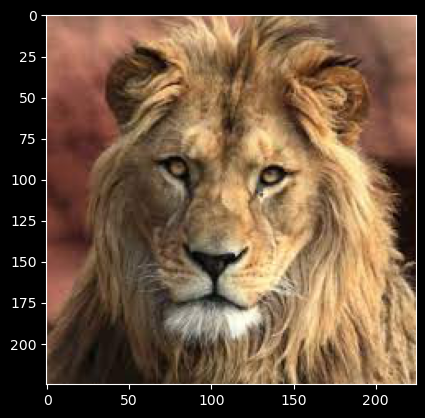

In [24]:
img = torch.from_numpy(img)
plt.imshow(img)

In [25]:
img.shape

torch.Size([225, 225, 3])

In [27]:
torch_img.permute(2,0,1).shape

torch.Size([3, 225, 225])

In [128]:
labels = [os.path.splitext(name)[0] for name in os.listdir('pictures') if os.path.splitext(name)[-1] == '.jpg']

In [121]:
batch_size = 5
batch = torch.zeros(batch_size, 3, 225, 225)

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((225, 225), antialias=None),
])

data_dir = 'pictures'
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.jpg']
for i, filename in enumerate(filenames):
    img_arr = Image.open(os.path.join(data_dir, filename))
    img_t = img_transform(img_arr)
    batch[i] = img_t

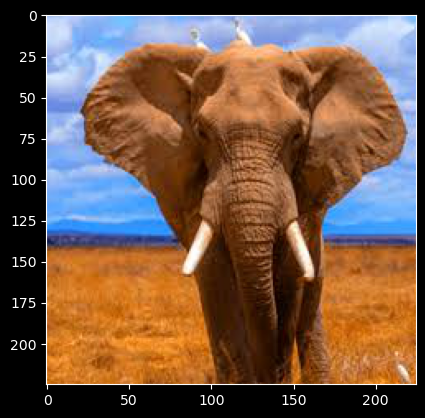

In [126]:
batch_p = batch.permute(0, 2, 3, 1)
plt.imshow(batch_p[2])

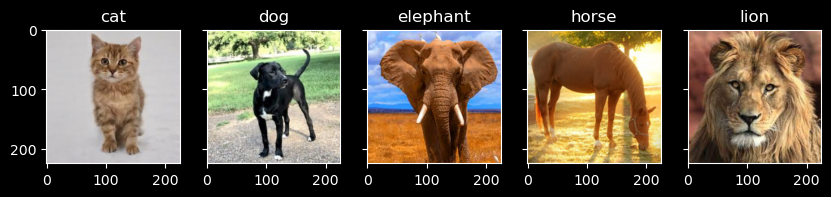

In [130]:
fig, axs = plt.subplots(1, batch_size, figsize=(10, 5),sharey=True)

for ax, pic, l in zip(axs, batch_p, labels):
    ax.imshow(pic, cmap='gray')
    ax.set_title(str(l))
    
plt.show()